In [1]:
from HGCalImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/Users/zihengchen/Documents/HGCal/workplace/data/'
#DatasetFile = 'CMSSW9304_partGun_PDGid22_x1000_E300.0To300.0_NTUP'
DatasetFile = 'CMSSW93X_pt35_pu200'
#%run ../scripts/utility_getinputhits_genpart.py $DatasetDir $DatasetFile 6 100

Welcome to JupyROOT 6.10/00


In [2]:
df = pd.read_hdf(DatasetDir+"input/"+DatasetFile+"_rechit.h5",key="table")

# 1. Run clustering

In [3]:
SetImagingAlgo()
dfresultclus = RunImagingAlgo(df,N=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 99/99 [16:38<00:00, 10.95s/it]


# 2.Make Some Plots

In [25]:
from utility_benchmark import *
energy3d,count3d = getcmsswmultclust(DatasetDir,DatasetFile,100)

                EffSigma      Peak
ImageAlgo3D:    1.448GeV, 113.265GeV
CMSSW:          1.258GeV, 90.274GeV


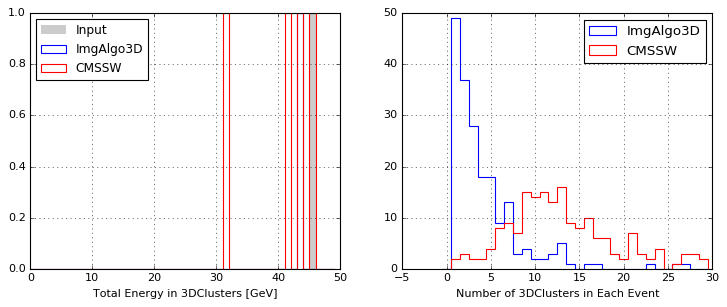

In [26]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(dfresultclus["clust_inputenergy"],bins=np.arange(0,50,1),
         color="k",alpha=0.2,histtype="stepfilled",lw=0,label="Input")
plt.hist(dfresultclus["clust_includedenergy"],bins=np.arange(0,50,1),
         color="b",alpha=1,histtype="step",lw=1,label="ImgAlgo3D")
plt.hist(energy3d,bins=np.arange(0,50,1),
         color="r",alpha=1,histtype="step",lw=1,label="CMSSW")
plt.grid(True)
plt.legend(loc="upper left",fontsize=11)
plt.xlabel("Total Energy in 3DClusters [GeV]")

plt.subplot(1,2,2)
f = plt.hist(dfresultclus["clust_n"],bins=np.arange(-.5,30,1),
             color="b",alpha=1,histtype="step", lw=1,label="ImgAlgo3D")
f = plt.hist(count3d,bins=np.arange(-.5,30,1),
             color="r",alpha=1,histtype="step", lw=1,label="CMSSW")
plt.grid(True)
plt.legend()
plt.xlabel("Number of 3DClusters in Each Event")


print("{:15}{:>9}{:>10}".format("","EffSigma","Peak"))
eff,ave = effsigma(dfresultclus["clust_includedenergy"])
eff = eff/30
print("{:15}{:6.3f}GeV, {:6.3f}GeV".format("ImageAlgo3D:",eff,ave))
eff,ave = effsigma(energy3d)
eff = eff/30
print("{:15}{:6.3f}GeV, {:6.3f}GeV".format("CMSSW:",eff,ave))

plt.savefig("../plot/result_energy.png")